In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from iminuit import Minuit
# Import SymPy: 
from sympy import * 

## SYMPY

In [2]:
# Defining the parameters:
mu1   =  3.5
sig1  =  0.4
mu2   =  0.8
sig2  =  0.2
rho12 =  0.5           # Correlation parameter!

In [3]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    
def myDiff(formula):
    return sqrt((formula.diff(L) * dL)**2 + (formula.diff(W) * dW)**2)

def myDiffWithCorr(formula, name = "", printNow = False):
    dd = sqrt((formula.diff(L) * dL)**2 + (formula.diff(W) * dW)**2 + 2*(formula.diff(L)*formula.diff(W)*(sigCorr**2)))
    if(printNow):
        lprint(latex(Eq(symbols('sigma_'+name), dd)))
    fd = lambdify((L,dL,W,dW,sigCorr),dd)
    return dd, fd
    
def diff_and_print(formula, name = ""):
    # Calculate uncertainty and print original relation/formula and the uncertainty
    dd = myDiff(formula)
    lprint(latex(Eq(symbols(name),formula)))
    lprint(latex(Eq(symbols('sigma_'+name), dd)))
    
def lambdifyFormula(formula, *args, name = ""):
    # Turn expression into numerical functions 
    f = lambdify((L,W),formula)
    d = myDiff(formula)
    fd = lambdify((L,dL,W,dW),d)
    return f, fd


In [4]:
# Define variables:
L,W,P = symbols("L, W, P")
dL,dW,dP = symbols("sigma_L, sigma_W, sigma_P")

# Define functions:

P = 2*L + 2*W

#print
diff_and_print(P,"P")

#get derivative 
dP = myDiff(P)

# Turn expressions into numerical functions 
fP, fdP = lambdifyFormula(P,"P")

# Define values and their errors
vL, vdL = mu1,sig1
vW, vdW = mu2,sig2

# Numerically evaluate expressions and print 
vP = fP(vL,vW)
vdP = fdP(vL,vdL,vW,vdW)

lprint(fr'P = ({vP:.1f} \pm {vdP:.1f})\,\mathrm{{m}}')

#Adding correlations (and also derivation, printing and lambdifying)
sigCorr = symbols("sigma_LW")
rho = symbols("rho_LW")

# Calculate uncertainty and print:
dP = sqrt((P.diff(L) * dL)**2 + (P.diff(W) * dW)**2)
lprint(latex(Eq(symbols('sigma_P'), dP)))

# Turn expression into numerical functions 
fP = lambdify((L,W),P)
fdP = lambdify((L,dL,W,dW),dP)

#CORRELATIONS
# sCorr = sqrt(rho*dL*dW)
# fSC = lambdify((rho,dL,dW),sCorr)

# vSigmaCorr = fSC(rho12,vdL,vdW)

# # Numerically evaluate expressions and print 
# vdP = fdP(vL,vdL,vW,vdW,vSigmaCorr)

# Define values and their errors
vL, vdL = mu1,sig1
vW, vdW = mu2,sig2

# Numerically evaluate expressions and print 
vP = fP(vL,vW)
vdP = fdP(vL,vdL,vW,vdW)
lprint(fr'P = ({vP:.1f} \pm {vdP:.1f})\,\mathrm{{m}}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## SIMULATION
if not stated otherwise errors are gaussians

In [5]:
mean_L = 3.5
std_L = 0.4
mean_W = 0.8
std_W = 0.2
num = 10000     #amount of random numbers 

#generate random numbers 
random_gaussian_L = stats.norm.rvs(loc=mean_L, scale=std_L,size=num) 
random_gaussian_W = stats.norm.rvs(loc=mean_W, scale=std_W,size=num) 

In [6]:
P_rand = 2*random_gaussian_L + 2*random_gaussian_W
P_std = P_rand.std()
P = P_rand.mean()
print(f'P=({P:.1f}+/-{P_std:.1f})')

P=(8.6+/-0.9)


## ERROR ON A FRACTION

In [7]:
def frac_error(a,b):
    """params:
       a: number 1
       b: number 2
       return: fraction with its error"""
    frac = a/b
    frac_error = np.sqrt((frac * (1-frac)) / b)
    return frac,frac_error


In [8]:
#example 
total = 103261
positives = 2464 
fraction, error = frac_error(positives,total)
print(f'{fraction:.4f}+/-{error:.4f}')

0.0239+/-0.0005


## WEIGHTED MEAN

In [9]:
def weighted_mean(values, uncertanties):
    """params:
       values: list of measurments
       uncertanties: list of uncertanties
       return: weighted mean and error"""
    weights= 1/uncertanties**2
    weighted_mean=np.average(values, weights=weights)
    error = np.sqrt(1/sum(weights))
#     variance = np.average((values-weighted_mean)**2,weights = weights)
#     weighted_std = np.sqrt(variance)
    return weighted_mean,error


In [10]:
#example 
results = np.array([9.54,9.36,10.02,9.87,9.98,9.86,9.86,9.81,9.79])
uncertanties= np.array([0.15,0.10,0.11,0.08,0.14,0.06,0.03,0.013,0.04])
results_mean, error = weighted_mean(results, uncertanties)
print(f'The best estimate  is {results_mean:.2f}+\-{error:.3f}')

The best estimate  is 9.81+\-0.011


In [11]:
residuals = abs(results - results_mean)
residuals

array([0.27422553, 0.45422553, 0.20577447, 0.05577447, 0.16577447,
       0.04577447, 0.04577447, 0.00422553, 0.02422553])

## Chauvenet's criterion


In [12]:
def std_away_func(results,uncertanties,results_mean):
    #calculate no of std away from the mean(equal to zvalue)
    std_away = abs((results-results_mean)/uncertanties)
    #p-values 
    p_values =(1-(stats.norm.cdf(std_away))) 
    #get the index 
    remove_i = np.argwhere(p_values == min(p_values))
    return std_away, p_values, remove_i

def Chauvenet(criterion,results,uncertanties):
    #list to store removed values 
    removed_values=[]
    removed_uncertanties = []
    
    #calculate best estimates 
    results_mean, error = weighted_mean(results, uncertanties)
    #how many standard deviations are results from the mean and its probability
    std_away, p_values, remove_i= std_away_func(results,uncertanties,results_mean)
    
    
    #if the values have more than x stds remove them 
    while min(p_values) <=criterion:
        #print(max(std_away))
        #save reoved values 
        removed_values.append(results[remove_i][0][0])
        removed_uncertanties.append(uncertanties[remove_i][0][0])
        
        #remove 
        results= np.delete(results.copy(), remove_i)
        uncertanties = np.delete(uncertanties.copy(),remove_i)
        #calculate new mean 
        results_mean, error = weighted_mean(results, uncertanties)
        
        #repeat 
        #how many standard deviations are results from the mean
        std_away, p_values, remove_i= std_away_func(results,uncertanties,results_mean)
        
    return results,uncertanties,removed_values,removed_uncertanties
        
results,uncertanties,removed_values,removed_uncertanties= Chauvenet(0.05,results,uncertanties)
results,uncertanties,removed_values,removed_uncertanties

(array([9.87, 9.98, 9.86, 9.86, 9.81, 9.79]),
 array([0.08 , 0.14 , 0.06 , 0.03 , 0.013, 0.04 ]),
 [9.36, 9.54, 10.02],
 [0.1, 0.15, 0.11])

## Constant fit 



In [13]:
# chi2 fit of constant
def chi2_constant(c):
    y_fit = np.ones_like(y) * c
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2
def constant_fit(y,sy):
    chi2_constant.errordef = Minuit.LEAST_SQUARES 
    minuit_simple = Minuit(chi2_constant, c=0)
    minuit_simple.migrad()

    c = minuit_simple.values[:][0]
    ec = minuit_simple.errors[:][0]
    res = y-chi2_constant(c)

    chi2 = minuit_simple.fval
    ndof =  len(y) - minuit_simple.nfit
    prob = stats.chi2.sf(chi2, ndof)

    return c, ec, res, chi2, ndof, prob

y = results
sy = uncertanties

g, eg, res, chi2, ndof, prob = constant_fit(y, sy)
print(f'g = ({g:.02f} ± {eg:.02f}), P(Chi2={chi2:.02f}, N_dof={ndof}) = {prob:.04f}')

g = (9.82 ± 0.01), P(Chi2=5.07, N_dof=5) = 0.4076


## Plot

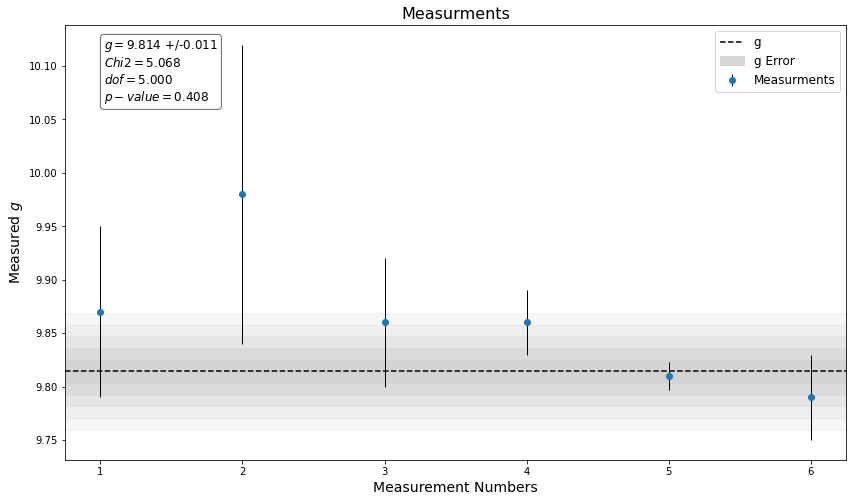

In [16]:
# hide
fig, ax = plt.subplots(figsize=(14,8)) 


#errors
ax.errorbar(np.arange(1,len(results)+1),results,uncertanties,
            label='Measurments', fmt = 'o',  ecolor='k', elinewidth=1, capthick=2)

old_lim = ax.get_xlim()
xlim = ax.get_xlim()
ax.hlines(results_mean, *xlim, color='k',linestyles='--',label='g')
#create a gradient 
ax.fill_between(np.arange(xlim[0], xlim[1]+1), 
                results_mean+error, results_mean-error, alpha=0.9, color='lightgray',label=('g Error'))
ax.fill_between(np.arange(xlim[0], xlim[1]+1),
                results_mean+2*error, results_mean-2*error, alpha=0.5, color='lightgray')
ax.fill_between(np.arange(xlim[0], xlim[1]+1),
                results_mean+3*error, results_mean-3*error, alpha=0.3, color='lightgray')
ax.fill_between(np.arange(xlim[0], xlim[1]+1),
                results_mean+4*error, results_mean-4*error, alpha=0.2, color='lightgray')
ax.fill_between(np.arange(xlim[0], xlim[1]+1),
                results_mean+5*error, results_mean-5*error, alpha=0.2, color='lightgray')
#text box
textstr = '\n'.join((
    r'$g=%.3f$ +/-$%.3f$' %(results_mean,error),
    r'$Chi2=%.3f$' % (chi2, ),
    r'$dof=%.3f$' % (ndof, ),
    r'$p-value=%.3f$' %(prob,),
    ))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.6)

# place a text box in upper left in axes coords
ax.text(0.05, 0.97, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
#
ax.set_ylabel('Measured $g$',fontsize=14)
ax.set_xlabel('Measurement Numbers',fontsize=14)
ax.set_title('Measurments',fontsize=16)
ax.set_xlim(*old_lim)
plt.legend(fontsize=12)
plt.show()